# Titanic Project


Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Z:\ML Datasets\Titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
df = df.drop(['Cabin'], axis = 1)
df['Embarked']  = df['Embarked'].fillna(df['Embarked'].mode()[0]) 
df['Age']  = df['Age'].fillna(df['Age'].mean())

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

# EDA

<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>

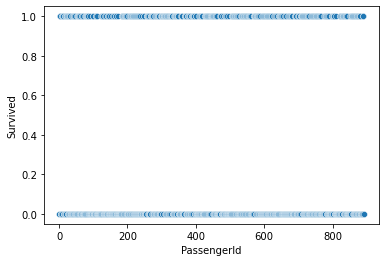

In [9]:
sns.scatterplot(data = df, x = 'PassengerId', y = 'Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

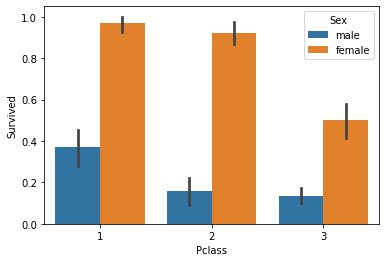

In [10]:
sns.barplot(data = df, x = 'Pclass', y = 'Survived', hue = 'Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

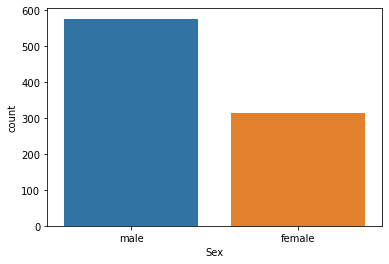

In [11]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Survived'>

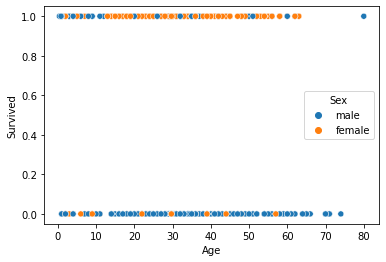

In [12]:
sns.scatterplot(data = df, x = 'Age', y = 'Survived', hue = 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

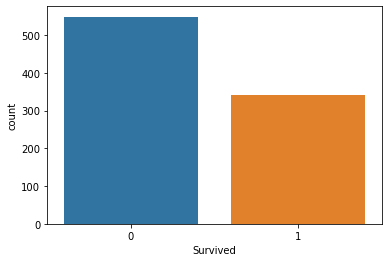

In [13]:
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

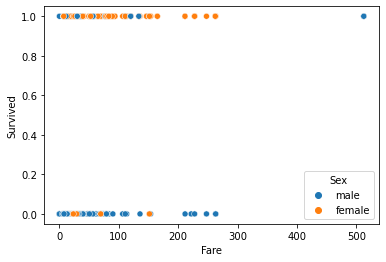

In [14]:
sns.scatterplot(data = df, x = 'Fare', y = 'Survived', hue = 'Sex')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

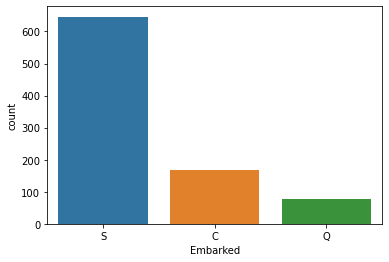

In [15]:
sns.countplot(df['Embarked'])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,523,18,2
1,1,1,0,190,0,52,1,0,596,207,0
2,2,1,2,353,0,34,0,0,669,41,2
3,3,1,0,272,0,48,1,0,49,189,2
4,4,0,2,15,1,48,0,0,472,43,2
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,1,35,0,0,101,85,2
887,887,1,0,303,0,24,0,0,14,153,2
888,888,0,2,413,0,39,1,2,675,131,2
889,889,1,0,81,1,34,0,0,8,153,0


In [17]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,52,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,48,1,0,189,2
4,0,2,1,48,0,0,43,2
...,...,...,...,...,...,...,...,...
886,0,1,1,35,0,0,85,2
887,1,0,0,24,0,0,153,2
888,0,2,0,39,1,2,131,2
889,1,0,1,34,0,0,153,0


# Correlation

In [18]:
df.corr().sum()

Survived    0.277210
Pclass     -0.008649
Sex         0.141292
Age         0.368382
SibSp       1.541341
Parch       1.513825
Fare        1.038914
Embarked    1.026508
dtype: float64

<AxesSubplot:>

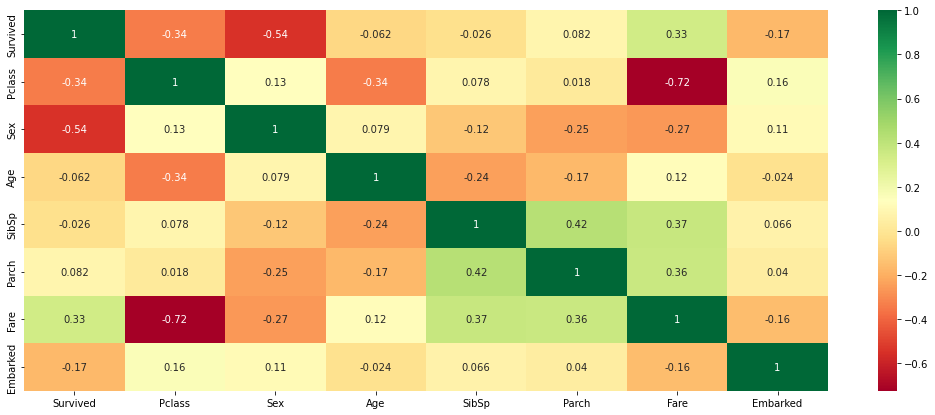

In [19]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(), annot = True, linecolor = 'black' , cmap = 'RdYlGn')

Survived       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Pclass      AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Sex         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age         AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp             AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch          AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare           AxesSubplot(0.529348,0.125;0.168478x0.343182)
Embarked       AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

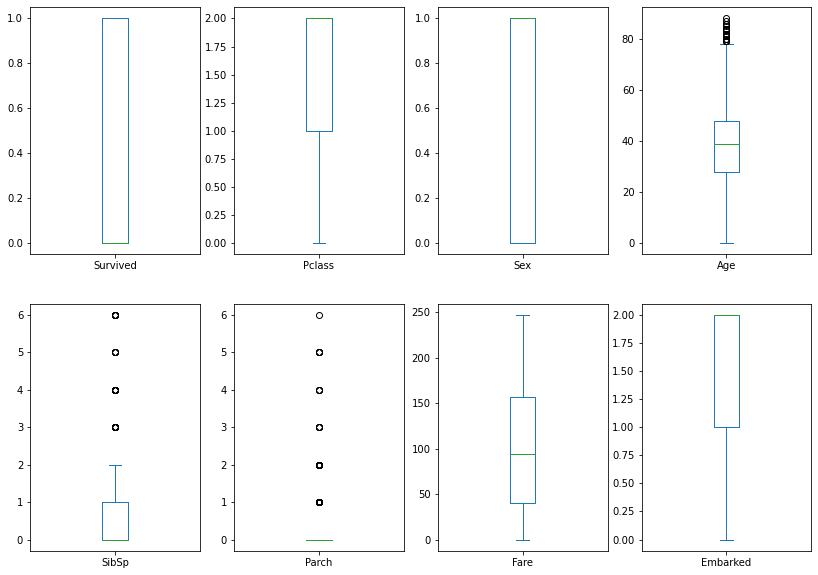

In [20]:
df.plot(kind = 'box', subplots = True, layout=(2,4), figsize = (14,10))

# Removing outliers using zscore


In [21]:
from scipy.stats import zscore
z = np.abs(zscore(df))
df1 = df[(z<3).all(axis=1)]
df.shape, df1.shape

((891, 8), (846, 8))

In [22]:
#Percentage of data loss

loss = ((891 - 846)/891)*100
loss

5.05050505050505

# Skewness

In [23]:
df1.skew()

Survived    0.426139
Pclass     -0.558458
Sex        -0.647065
Age         0.411739
SibSp       2.018553
Parch       2.044444
Fare        0.466345
Embarked   -1.212376
dtype: float64

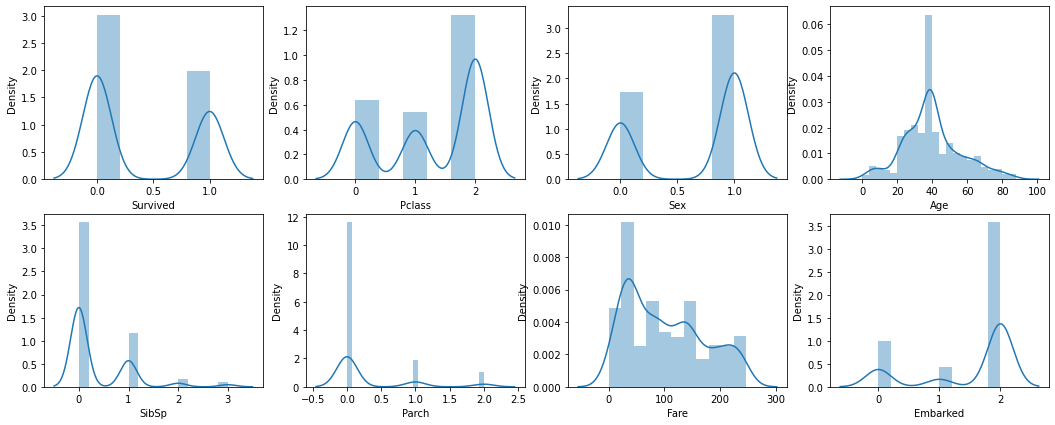

In [24]:
plt.figure(figsize=(18,7))
for i, column in enumerate(df1.columns, 1):
    plt.subplot(2,4,i)
    sns.distplot(df1[column])

In [25]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,0.395981,1.276596,0.653664,39.771868,0.355792,0.268322,102.153664,1.520095
std,0.489350,0.842142,0.476083,16.303808,0.637958,0.579830,70.118581,0.803217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,40.000000,1.000000
50%,0.000000,2.000000,1.000000,39.000000,0.000000,0.000000,85.000000,2.000000
75%,1.000000,2.000000,1.000000,48.000000,1.000000,0.000000,149.750000,2.000000
max,1.000000,2.000000,1.000000,88.000000,3.000000,2.000000,247.000000,2.000000


In [26]:
X = df1.drop(['Survived'], axis = 1)
Y = df1['Survived']

In [27]:
#Transformimng data to remove skewness

from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[ 0.88521268,  0.7278992 , -0.69026547, ..., -0.49776095,
        -1.38818253,  0.62138773],
       [-1.45416411, -1.37381659,  0.76716925, ..., -0.49776095,
         1.33041341, -1.74999188],
       [ 0.88521268, -1.37381659, -0.30553222, ..., -0.49776095,
        -0.79791981,  0.62138773],
       ...,
       [ 0.88521268, -1.37381659,  0.00328101, ...,  2.0373313 ,
         0.55527323,  0.62138773],
       [-1.45416411,  0.7278992 , -0.30553222, ..., -0.49776095,
         0.79967696, -1.74999188],
       [ 0.88521268,  0.7278992 ,  0.24381203, ..., -0.49776095,
        -1.05024185, -1.17963484]])

In [28]:
#Standardizing data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.88521268,  0.7278992 , -0.69026547, ..., -0.49776095,
        -1.38818253,  0.62138773],
       [-1.45416411, -1.37381659,  0.76716925, ..., -0.49776095,
         1.33041341, -1.74999188],
       [ 0.88521268, -1.37381659, -0.30553222, ..., -0.49776095,
        -0.79791981,  0.62138773],
       ...,
       [ 0.88521268, -1.37381659,  0.00328101, ...,  2.0373313 ,
         0.55527323,  0.62138773],
       [-1.45416411,  0.7278992 , -0.30553222, ..., -0.49776095,
         0.79967696, -1.74999188],
       [ 0.88521268,  0.7278992 ,  0.24381203, ..., -0.49776095,
        -1.05024185, -1.17963484]])

In [29]:
X = pd.DataFrame(X)

In [30]:
Y.value_counts()

0    511
1    335
Name: Survived, dtype: int64

In [31]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X, Y = ros.fit_resample(X,Y)
Y.value_counts()

0    511
1    511
Name: Survived, dtype: int64

# Train test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 43)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# 1. Logistic Regression


In [34]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv=None)
cvs.mean()

[[89 21]
 [17 78]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       110
           1       0.79      0.82      0.80        95

    accuracy                           0.81       205
   macro avg       0.81      0.82      0.81       205
weighted avg       0.82      0.81      0.81       205

0.8146341463414634


0.7896365375418462

# 2. Descison Tree Classifier


In [35]:
#Descison Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(dt, X, Y, cv=None)
cvs.mean()


[[93 17]
 [13 82]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       110
           1       0.83      0.86      0.85        95

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

0.8536585365853658


0.8386322333811573

# 3. Random Forest Classifier

In [36]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rf, X, Y, cv=None)
cvs.mean()

[[91 19]
 [10 85]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       110
           1       0.82      0.89      0.85        95

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205

0.8585365853658536


0.8474318507890961

# 4. Support Vector Classifier


In [37]:
#Support Vector Classifier

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
pred = svc.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(svc, X, Y, cv=None)
cvs.mean()


[[85 25]
 [16 79]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       110
           1       0.76      0.83      0.79        95

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205

0.8


0.7965184122429461

# 5. KNN Classifier


In [38]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(knn, X, Y, cv=None)
cvs.mean()


[[89 21]
 [16 79]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.79      0.83      0.81        95

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205

0.8195121951219512


0.8121999043519847

# 6. Gradient Boosting Classifier


In [39]:
# GBClassifier

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
pred = gb.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(gb, X, Y, cv=None)
cvs.mean()

[[92 18]
 [13 82]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.82      0.86      0.84        95

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

0.848780487804878


0.8385891917742707

# 7. XGBoost Classifier


In [40]:
# XGBoost Classifier

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
pred = xgb.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(xgb, X, Y, cv=None)
cvs.mean()

[04:36:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[92 18]
 [13 82]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.82      0.86      0.84        95

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

0.848780487804878
[04:36:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:36:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary

0.8337063605930177

# 8. AdaBoost classifier


In [41]:
# AdaBoost classifier

from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train,Y_train)
pred = adb.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(adb, X, Y, cv=None)
cvs.mean()

[[85 25]
 [13 82]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.77      0.86      0.81        95

    accuracy                           0.81       205
   macro avg       0.82      0.82      0.81       205
weighted avg       0.82      0.81      0.81       205

0.8146341463414634


0.808283118125299

# 9. Naive Bayes Classifier


In [42]:
# GaussianNB Classifier

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
pred = nb.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(nb, X, Y, cv=None)
cvs.mean()

[[78 32]
 [16 79]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       110
           1       0.71      0.83      0.77        95

    accuracy                           0.77       205
   macro avg       0.77      0.77      0.77       205
weighted avg       0.78      0.77      0.77       205

0.7658536585365854


0.7701243424198948

# Hyperparameter Tuning 

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
n_estimators = range(1,500,35)
criterion = ('gini', 'entropy', 'log_loss')
max_depth = [10, 25, 30, 43]
min_samples_split = [10,20,30,40]
max_features = ('sqrt', 'log2')

random_grid = {'n_estimators' : n_estimators,
               'criterion' : criterion,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'max_features' : max_features}
random_grid

{'n_estimators': range(1, 500, 35),
 'criterion': ('gini', 'entropy', 'log_loss'),
 'max_depth': [10, 25, 30, 43],
 'min_samples_split': [10, 20, 30, 40],
 'max_features': ('sqrt', 'log2')}

In [45]:
xgb = XGBClassifier()
rscv = RandomizedSearchCV(estimator = xgb,
                        param_distributions = random_grid,
                         n_iter = 10,
                         cv = 5,
                         n_jobs= -1)

rscv.fit(X_train,Y_train)
rscv

[04:36:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:36:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy',
                                                      'log_loss'),
                                        'max_depth': [10, 25, 30, 43],
                                        'max_features': ('sqrt', 'log2'),
                                        'min_samples_split': [10, 20, 30, 40],
                                        'n_estimators': range(1, 500, 35)})

In [46]:
rscv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='log_loss',
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              max_features='log2', min_child_weight=1, min_samples_split=40,
              missing=nan, monotone_constraints='()', n_estimators=351,
              n_jobs=16, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

In [47]:
best_rscv = rscv.best_estimator_
pred = best_rscv.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rscv, X, Y, cv=None)
cvs.mean()

[[96 14]
 [13 82]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       110
           1       0.85      0.86      0.86        95

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

0.8682926829268293
[04:36:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:36:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the 

0.8503299856527977

# Stratified K-fold cross validation

In [48]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10)
skf.split(X,Y)

#this gives train_index and test_index which is very important

<generator object _BaseKFold.split at 0x0000015559124CF0>

In [49]:
accuracy= []

skf = StratifiedKFold(n_splits=10, random_state = None)
skf.get_n_splits(X,Y)

#X is the feature set and Y is the target
#Putiing train_index and test_index of X and Y

for train_index, test_index in skf.split(X,Y):
    print('Train:', train_index, 'Validation:', test_index)
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    Y1_train, Y1_test = Y.iloc[train_index], Y.iloc[test_index]
    
rscv.fit(X1_train, Y1_train)
pred = rscv.predict(X1_test)
score = accuracy_score(pred, Y1_test)
accuracy.append(score)

Train: [  91   92   93   94   95   96   97  100  102  103  104  105  106  107
  108  109  110  111  112  113  115  117  120  121  122  123  125  126
  128  129  130  131  134  135  136  138  139  140  141  142  143  144
  145  146  147  148  149  150  151  152  153  154  155  156  157  158
  159  160  161  162  163  164  165  166  167  168  169  170  171  172
  173  174  175  176  177  178  179  180  181  182  183  184  185  186
  187  188  189  190  191  192  193  194  195  196  197  198  199  200
  201  202  203  204  205  206  207  208  209  210  211  212  213  214
  215  216  217  218  219  220  221  222  223  224  225  226  227  228
  229  230  231  232  233  234  235  236  237  238  239  240  241  242
  243  244  245  246  247  248  249  250  251  252  253  254  255  256
  257  258  259  260  261  262  263  264  265  266  267  268  269  270
  271  272  273  274  275  276  277  278  279  280  281  282  283  284
  285  286  287  288  289  290  291  292  293  294  295  296  297  298

In [50]:
np.array(accuracy).mean()

0.8921568627450981

# 89% accuracy is awesome! 🤩🤩🤩

# Model saving 

In [52]:
import pickle
filename = 'Titanic.pkl'
pickle.dump(xgb, open(filename, 'wb'))

# wb stands for write binary